In [1]:
from pathlib import Path

import tifffile
import pooch

from torch_segment_fiducials_2d import predict_fiducial_probabilities, predict_fiducial_mask

/Users/aburt/Projects/torch-segment-fiducials-2d/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/aburt/Projects/torch-segment-fiducials-2d/.venv/lib/python3.13/site-packages/tiler/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# https://github.com/fatiando/pooch
GOODBOY = pooch.create(
    path=pooch.os_cache("torch-segment-fiducials-2d"),
    base_url="doi:10.5281/zenodo.15269648/",
    registry={
        "EMPIAR-10164_TS_01_000_0.0_image.tif": "md5:5ae21ea749fd7298c6991dd9f8872b44",
    },
)

image_file = Path(GOODBOY.fetch("EMPIAR-10164_TS_01_000_0.0_image.tif", progressbar=True))
pixel_spacing = 8

In [3]:
image = tifffile.imread(image_file)
probabilities = predict_fiducial_probabilities(image, pixel_spacing=pixel_spacing)
mask = predict_fiducial_mask(image, pixel_spacing=pixel_spacing, probability_threshold=0.99)

Lightning automatically upgraded your loaded checkpoint from v1.9.2 to v2.5.1.post0. To apply the upgrade to your files permanently, run `python -m lightning.pytorch.utilities.upgrade_checkpoint ../../../Library/Caches/fidder/fidder.ckpt`
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


Lightning automatically upgraded your loaded checkpoint from v1.9.2 to v2.5.1.post0. To apply the upgrade to your files permanently, run `python -m lightning.pytorch.utilities.upgrade_checkpoint ../../../Library/Caches/fidder/fidder.ckpt`
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


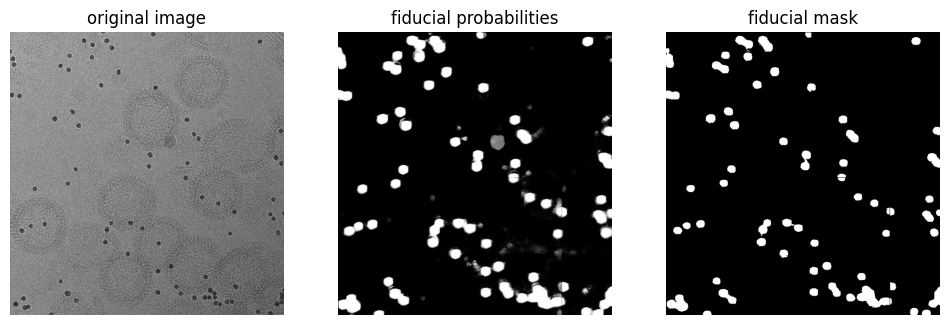

In [4]:
import torch
from matplotlib import pyplot as plt
from torch_fourier_rescale import fourier_rescale_2d
image_downsized = fourier_rescale_2d(torch.tensor(image), source_spacing=8, target_spacing=30)
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("original image")
ax[1].imshow(probabilities, cmap='gray')
ax[1].set_title("fiducial probabilities")
ax[2].imshow(mask, cmap='gray')
ax[2].set_title("fiducial mask")
for _ax in ax:
    _ax.axis('off')